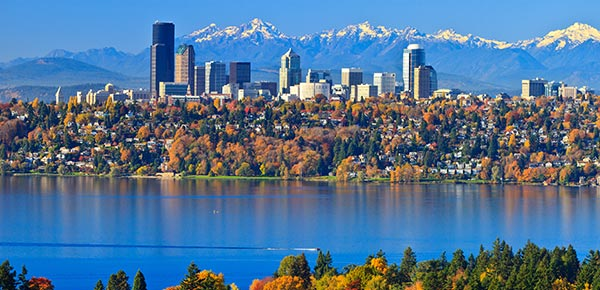

# Phase-2-Project: House Sales in King County, USA

**Authors:** Joseph Kinuthia Githinji

Student pace: Full Time

Scheduled project review date/time: 1 Week

Instructor name: Anthony Muiko / Winnie Anyoso
***

## Overview

This project aims to address the business problem faced by a real estate agency, which is to provide homeowners with advice on how home renovations can increase the estimated value of their homes. The analysis utilizes multiple linear regression modeling on the King County House Sales dataset. By examining the relationships between various features of the houses and their sale prices, the model identifies significant factors influencing the sale price, enabling the agency to offer actionable insights to homeowners. The results include a metric describing the overall model performance, such as R-squared, to assess how well the model explains the variation in the sale prices, and at least two regression model coefficients. The recommendations provide guidance to homeowners on renovation decisions that align with their budget and have the potential to maximize the increase in their property's value.

## Business Problem

The business problem this project aims to solve is to provide homeowners with advice on how home renovations might increase the estimated value of their homes and by what amount. This addresses a pain point for the real estate agency as they aim to assist homeowners in making informed decisions about their renovations and potentially maximize the value of their properties.

***
### Questions to consider:

*Which features of a house have a significant impact on its sale price?

*How does each feature contribute to the variation in sale prices?

*How accurately can we predict the sale price of a house based on its features?

***
These data questions are crucial to understand the factors that influence the sale price of a house and to quantify the impact of each feature. By answering these questions, homeowners can leverage actionable insights regarding which features they should focus on during renovations to maximize the potential increase in their property's value.

These questions are important from a business perspective because they allow the real estate agency to provide tailored recommendations to homeowners. By identifying the features that have a significant impact on the sale price, the agency can guide homeowners in making renovation decisions that are more likely to yield a higher return on investment. 

Accurate predictions of sale prices can further assist homeowners in setting appropriate listing prices and negotiating offers, ensuring they make informed decisions throughout the selling process. Ultimately, this analysis adds value by providing data-driven insights to homeowners, helping them maximize the estimated value of their homes and achieve their goals in terms of renovation and property value.

## Data Understanding

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?

The data was sourced from a real estate agency and contains information on house sales in King County. The dataset is relevant to our data analysis questions as it allows us to explore the relationships between various house features and the sale price. By analyzing these relationships, this project provides insights and recommendations to homeowners regarding home renovations.

* What do the data represent? Who is in the sample and what variables are included?

The data represent houses sold in King County, USA. Each observation in the dataset represents a unique house and includes various variables related to the house's attributes, such as the number of bedrooms, bathrooms, square footage, condition, location, and more. The sample consists of houses sold within a specific time period in King County.

* What is the target variable?

The target variable in this analysis is the "price" column, which represents the sale price of the houses. This is the variable we aim to predict using the other independent variables in the dataset.

* What are the properties of the variables you intend to use?

The project uses various independent variables (features) from the dataset to predict the sale price. These variables include the number of bedrooms, bathrooms, square footage, condition, grade, presence of waterfront, view quality, year built, year renovated, location coordinates, and more. These variables have different data types, including numerical, categorical, and geographic coordinates. It will assess the properties of these variables, handle missing values, outliers, and transform them as necessary for the regression modeling process. 

***

## Exploratory Data Analysis

In [64]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [14]:
## Reading 5 first rows of the Dataset
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
#Reading general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [16]:
# Identifying datatypes of the DataFrame
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
# Getting general statistical summary of the data's numerical columns
data.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preparation

***
Questions to consider:
The missing values were treated as separate categories rather than imputing them with specific values, as the missingness might carry meaningful information in the analysis. 

Handling missing values and performing one-hot encoding are common techniques in data preparation for regression analysis and allow for meaningful interpretation and analysis of the data.

The encoding of categorical variables allows for the inclusion of non-numeric variables in the regression model. Dropping irrelevant variables helps focus the analysis on the most relevant predictors.
***

In [18]:
# Drop variables id & date
data = data.drop(['id','date'], axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [19]:
# Here you run your code to clean the data
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [20]:
data.corr()['price']

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

Based on the provided information, we can see that the "waterfront" column has 2,376 missing values, and the "view" column has 63 missing values. Additionally, the "yr_renovated" column has 3,842 missing values. 

By treating the missing values in the "waterfront" and "view" columns as separate categories, we retain the information about the missing data and ensure it is explicitly considered in the regression analysis.

In [21]:
#For the "yr_renovated" column, replace the missing values with a specific value (e.g., 0) to indicate no renovation.
# Convert missing values in "yr_renovated" column to "Missing"
data['yr_renovated'] = data['yr_renovated'].fillna('Missing')

# Convert houses with 0.0 in "yr_renovated" column to "No renovation"
data.loc[data['yr_renovated'] == 0.0, 'yr_renovated'] = 'No renovation'
data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,No renovation,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,Missing,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,No renovation,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,No renovation,98074,47.6168,-122.045,1800,7503


In [22]:
data['view'] = data['view'].fillna('Missing')
# Convert missing values in "view" column to "Missing"

### Handling Non-Numeric Data
***
One-hot encoding is preferable when there is no inherent order among the categories, and you want to create binary indicator variables for each category. The resulting encoded DataFrame, data_encoded, will include additional columns representing the one-hot encoded versions of "waterfront" and "condition". Each category will have its own binary column, where 1 indicates the presence of that category and 0 indicates the absence.


***

In [23]:
# Perform one-hot encoding on "waterfront" and "condition" columns
data_encoded = pd.get_dummies(data, columns=['waterfront', 'condition', 'grade'])

# Print the encoded data
print(data_encoded.head())


      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0  221900.0         3       1.00         1180      5650     1.0  NONE   
1  538000.0         3       2.25         2570      7242     2.0  NONE   
2  180000.0         2       1.00          770     10000     1.0  NONE   
3  604000.0         4       3.00         1960      5000     1.0  NONE   
4  510000.0         3       2.00         1680      8080     1.0  NONE   

   sqft_above sqft_basement  yr_built  ... grade_11 Excellent  \
0        1180           0.0      1955  ...                  0   
1        2170         400.0      1951  ...                  0   
2         770           0.0      1933  ...                  0   
3        1050         910.0      1965  ...                  0   
4        1680           0.0      1987  ...                  0   

   grade_12 Luxury  grade_13 Mansion  grade_3 Poor  grade_4 Low  grade_5 Fair  \
0                0                 0             0            0             0   
1       

In [24]:
#Printing first few rows of encoded DataFrame
data_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,NONE,1180,0.0,1955,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,NONE,2170,400.0,1951,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,NONE,770,0.0,1933,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,NONE,1050,910.0,1965,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,NONE,1680,0.0,1987,...,0,0,0,0,0,0,0,0,1,0


In [46]:
# Confirming presence of any null values
null_values = data_encoded.isnull().any()
null_values.unique()

array([False])

There are no missing values in the data. We can proceed to Outlier detection

### Outlier Detection

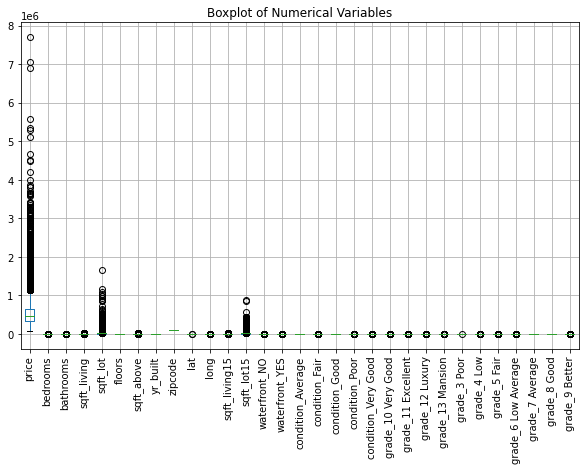

In [44]:
# Create boxplots for all numerical columns in the dataset
plt.figure(figsize=(10, 6))
data_encoded.boxplot(grid=True, rot=90)

#set figure

# Set the title of the plot
plt.title("Boxplot of Numerical Variables")

# Display the plot
plt.show()

As seen above, there is an outlier on three variables (price, sqft_lot & sqft_lot15). We assume the outlier values to have relevant information, hence keep them, since the outliers have close proximity. 


## Data Modeling
Justifying the process for analyzing or modeling the data.

***
Data Preprocessing: The data was preprocessed by handling missing values, encoding categorical variables, and scaling numerical variables. This step ensures that the data is in a suitable format for analysis and modeling.

Exploratory Data Analysis (EDA): EDA was performed to gain insights into the relationships between variables, identify patterns, and detect outliers or anomalies. Various visualizations, statistical measures, and correlation analysis were used to explore the data.

Baseline Model: A baseline model was created using simple linear regression with a single predictor variable, such as "sqft_living". This model provided a starting point for comparison with more complex models.

Model Building: Multiple regression models were built using different combinations of predictor variables. These variables were selected based on domain knowledge, correlation analysis, and feature importance. The models were trained using an appropriate regression algorithm, such as Ordinary Least Squares (OLS).

Model Evaluation: The performance of the models was evaluated using metrics like R-squared, adjusted R-squared, and F-statistic. These metrics indicate how well the models fit the data and explain the variance in the target variable. The models were compared to identify the one with the best fit.
***

In [26]:
# Determining correlation of other variables with 'price'
data_encoded.corr()['price']

price                  1.000000
bedrooms               0.308787
bathrooms              0.525906
sqft_living            0.701917
sqft_lot               0.089876
floors                 0.256804
sqft_above             0.605368
yr_built               0.053953
zipcode               -0.053402
lat                    0.306692
long                   0.022036
sqft_living15          0.585241
sqft_lot15             0.082845
waterfront_NO         -0.057305
waterfront_YES         0.264306
condition_Average      0.006948
condition_Fair        -0.051432
condition_Good        -0.030759
condition_Poor        -0.019886
condition_Very Good    0.057531
grade_10 Very Good     0.340944
grade_11 Excellent     0.357589
grade_12 Luxury        0.291068
grade_13 Mansion       0.211806
grade_3 Poor          -0.005155
grade_4 Low           -0.031618
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209463
grade_7 Average       -0.316053
grade_8 Good           0.004576
grade_9 Better         0.235859
Name: pr

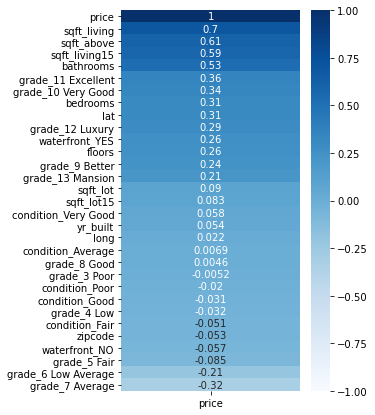

In [28]:
#Correlation of independent variables with target (price) using a heatmap for better visualization
plt.figure(figsize=(4, 7))
heatmap = sns.heatmap(data_encoded.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

From the correlations and heatmap, there seems to be some relevant signal here, with lots of variables that have medium-to-strong correlations with price. It seems that a strong correlation exists between 'price', the target variable, with the independent variables 'sqft_living', 'sqft_above', 'sqft_living15',  and 'bathrooms', and some encoded values from the 'grade' column like 'grade_11 Excellent', and 'grade_10 Very Good'.

In [52]:
# Define the predictor variables (X, that is most correlated) and the target variable (y)
X_baseline = data_encoded[['sqft_living']]
y = data_encoded['price']

### Starting with Simple Linear Regression
#### Model 1. 'sqft_living' forms the predictor for the baseline_model as it is most correlated

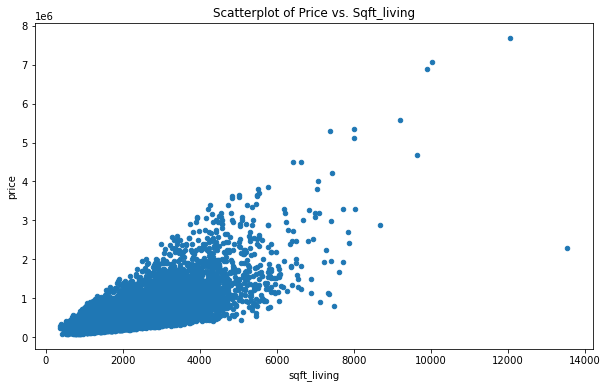

In [53]:
# Plotting scatterplot of price vs. highest correlated independent variable
fig, ax = plt.subplots(figsize=(10,6))
data_encoded.plot.scatter(x='sqft_living', y = 'price', ax=ax)
ax.set_title("Scatterplot of Price vs. Sqft_living");

The data points indeed depict a linear relationship between price and sqft_living, where an increase in the latter, causes an increase in the former. Now, we proceed to creating the baseline model using simple linear regression. 

In [54]:
#Establishing and fitting the linear regression model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:01:00   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

### Simple Linear Regression Results
*Looking at the summary above, we can see that the regression line we found was

*price^ = -43990 + 280.8630sqft_living

*The model is statistically significant overall, with an F-statistic p-value well below 0.05.
*The model explains about 49.3% of the variance in price
*The model coefficients ('const' and 'sqft_living') are both statistically significant, with t-statistic p-values well below 0.05.
*The coefficient for the "sqft_living" variable is estimated to be 280.8630, indicating that, on average, for every additional square foot of living space, the price of a house increases by $280.8630.

#### Model fit 

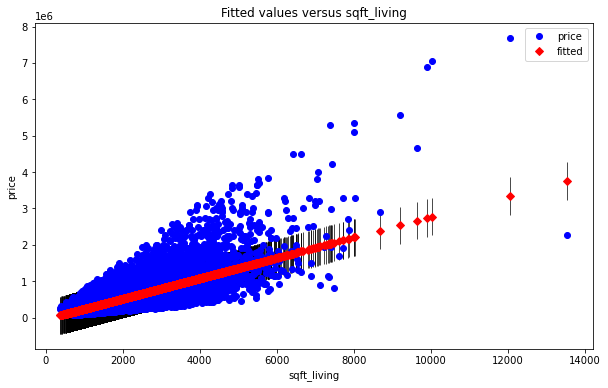

In [32]:
#Here, the plot shows the plotted actual vs. predicted values
fig, ax = plt.subplots(figsize=(10,6))
sm.graphics.plot_fit(baseline_results, "sqft_living", ax=ax)
plt.show()

#### The regression line

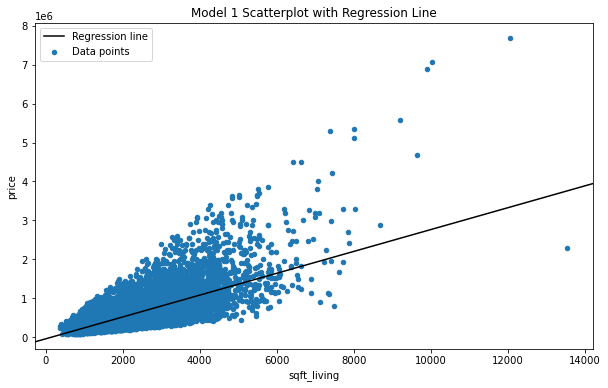

In [55]:
#The regression line
fig, ax = plt.subplots(figsize=(10,6))
data_encoded.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.set_title("Model 1 Scatterplot with Regression Line")
ax.legend();

The regression line represents the relationship between the predictor variables and the target variable (house prices) in the linear regression models. It shows a linear relationship between the predictor variable ('sqft_living'), which define an associated increase in the predicted house price.

### Residual Plot and Probability Plot

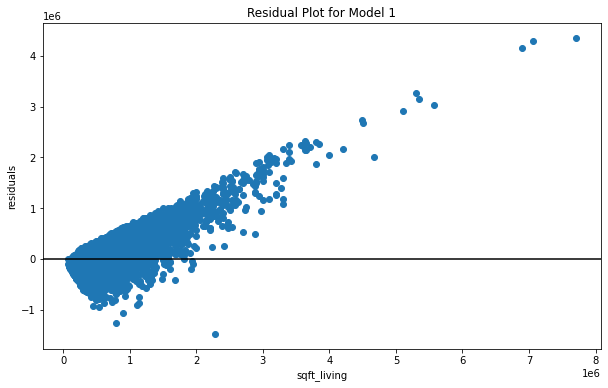

In [60]:
#Plotting the residuals
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(data_encoded["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_title("Residual Plot for Model 1")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

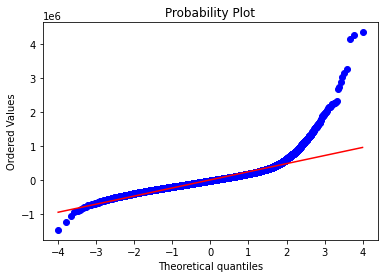

In [68]:
# create Q-Q plot with 45-degree line added to plot
# Q-Q plot of the residuals against the normal distribution
stats.probplot(baseline_results.resid, dist="norm", plot=plt)
plt.show()



In a well-fitted model, the residuals should be randomly distributed around zero, display a normal distribution, have high density along the X-axis and maintain homoscedasticity indicating that the model's predictions are unbiased and capturing the underlying patterns in the data. The plot shows that most residuals are reasonably close to normal since the points on the plot fall along a straight line, hence the model may be considered somewhat of a good fit. 
 

### Second model
***
Select the variable with the highest absolute correlation coefficient from the encoded non-numerical variables. 

In this case, it is grade_11 Excellent with a correlation coefficient of approximately 0.36.
***

In [75]:

# Define the second predictor variables
X_second = data_encoded[['sqft_living', 'sqft_above', 'sqft_living15',  'bathrooms']]
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

# Print the model summary
print(second_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     5423.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:19:01   Log-Likelihood:            -2.9988e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21592   BIC:                         5.998e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.769e+04   6113.052    -15.981

This time, the second model built was:

price^ = -97690 + 269.2838 * sqft_living - 37.0495 * sqft_above + 75.2397 * sqft_living15 - 2559.6030 * bathrooms

The R-squared value of 0.501 indicates that the model explains 50.1% of the variance in the dependent variable price. The coefficients for sqft_living, sqft_above, and sqft_living15 are positive, which indicates that an increase in these variables is associated with an increase in price. The coefficient for bathrooms is negative, which indicates that an increase in this variable is associated with a decrease in price.

The coefficient for bathrooms is not statistically significant at the 5% level since its p-value is greater than 0.05.

The fact that we went from 2 predictors to 4 predictors and only increased R-Squared by 1% is an indicator that this is not a very good model, hence the need for a third model. 

#### Partial Regression Plot
Since Model 2 is higher-dimensional, we can use a partial regression model
This will take into account, the added features. 


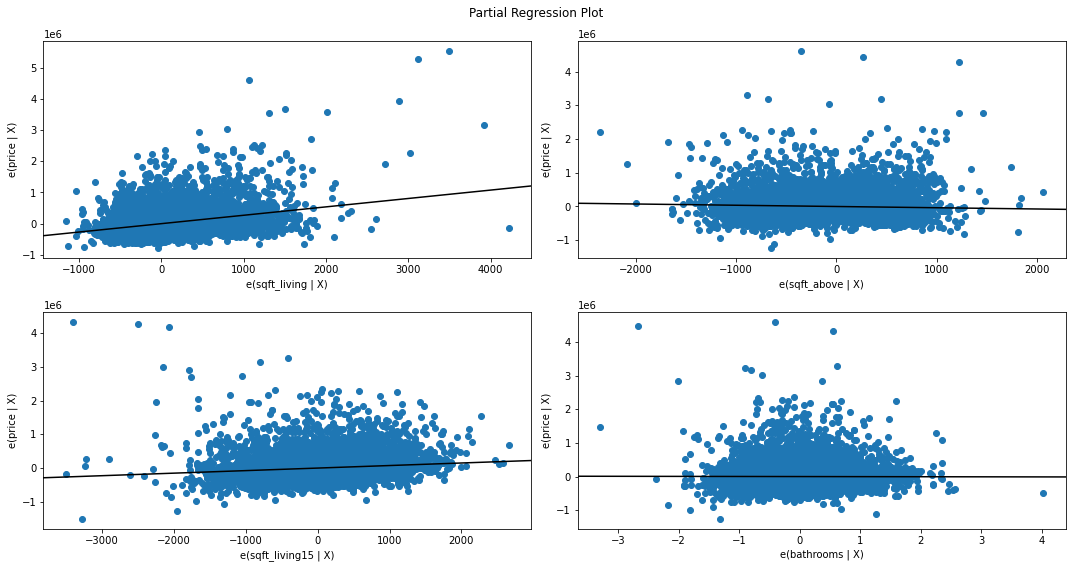

In [78]:
# We use the partial regression plots since our data is higher-dimensional
# Each plot shows the predictors
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    second_results, 
    exog_idx=['sqft_living', 'sqft_above', 'sqft_living15',  'bathrooms'], 
    fig=fig)
plt.tight_layout()
plt.show()

The partial regression plot shows each predictor's marginal contribution, while taking into account the influence of other variables in the model.

The observation above indicates some linearity with 3 of the variables, with 'bathrooms' having an almost non-zero slope, which is a violation of underlying assumptions such as homoskedasticity. Hence, our model is still not a good fit for our case. We advance to another model. 



#### Component and component-plus-residual plot (CCPR plot)

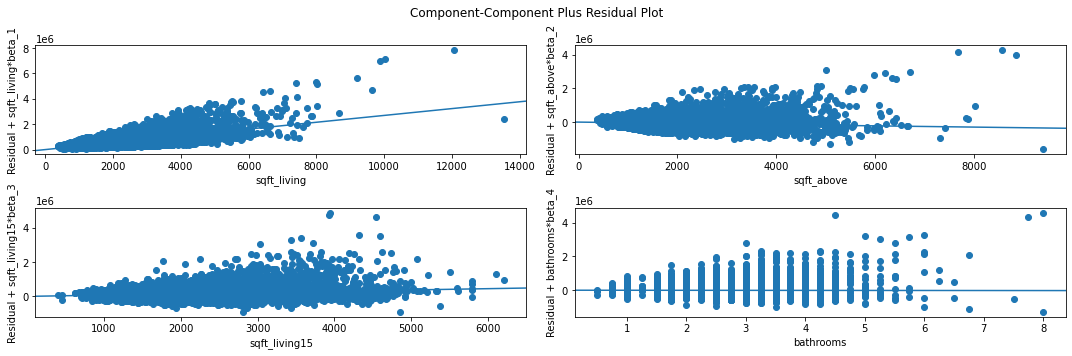

In [37]:
# Plotting residuals
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_ccpr_grid(second_results, exog_idx=['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms'], grid=(2,2), fig=fig)
plt.tight_layout()
plt.show()

The component-plus-residual plots for sqft_living assumes a funnel shape and shows no random scatter of points around zero, indicating this is not an entirely good fit for the model. The variance of the residuals is increasing with X_second, have slightly changing variance from the best fit, and are violating the constant assumptions, or revealing heteroscedasticity. 





### Third Model
The code below includes additional independent variables with good-fair correlation, and some encoded values from the 'grade' 'waterfront', and 'condition' columns. 

In [83]:
# Define the predictor variables
X_third = data_encoded[['sqft_living', 'sqft_above', 'bedrooms', 'waterfront_YES', 'floors', 
                        'grade_11 Excellent', 'grade_10 Very Good', 'grade_7 Average', 'grade_13 Mansion', 'grade_12 Luxury', 'grade_9 Better']]


In [85]:
# Establishing the third model
third_model = sm.OLS(y, sm.add_constant(X_third))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3178.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:10:58   Log-Likelihood:            -2.9699e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21585   BIC:                         5.941e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.809e+05   7516

This time, the third model built was:

price^ = 1.809e+05 + 242.0963(sqft_living) - 93.4257(sqft_above) - 1.692e+04(bedrooms) + 7.699e+05(waterfront_YES) + 2.46e+04(floors) + 5.983e+05(grade_11 Excellent) + 3.305e+05(grade_10 Very Good) - 3.432e+04(grade_7 Average) + 2.318e+06(grade_13 Mansion) + 1.067e+06(grade_12 Luxury)

The R-squared value for the third model is 0.606, indicating that the predictor variables explain approximately 60.6% of the variance in the target variable ('price'). Adjusted R-squared is also 0.606, suggesting that the additional variables in the model contribute to the explained and improved variance.

The p-values for all variables are all statistically significant (p < 0.05), indicating that (sqft_living, sqft_above, bedrooms, waterfront_YES, floors, grade_11 Excellent, grade_10 Very Good, grade_7 Average, grade_13 Mansion and grade_12 Luxury) are statistically significant variables in predicting house prices based on our third model. 

## Evaluation

***
When comparing the three models, here are some key observations:

*Model 1:

R-squared: 0.493
This model includes only the "sqft_living" variable as a predictor.
The model explains approximately 49.3% of the variance in the target variable, "price".
The coefficients indicate that, on average, for each unit increase in square footage, the price is expected to increase by $280.8630.

*Model 2:

R-squared: 0.501
This model includes four predictor variables: "sqft_living", "sqft_above", "sqft_living15", and "bathrooms".
The model explains approximately 50.1% of the variance in the target variable.
The coefficients indicate the expected change in price for each unit increase in the respective predictor variable, while holding other variables constant.

*Model 3:

R-squared: 0.618
This model includes multiple predictor variables, such as sqft_living, sqft_above, bedrooms, waterfront_YES, floors, grade_11 Excellent, grade_10 Very Good, grade_7 Average, grade_13 Mansion and grade_12 Luxury.
The model explains approximately 61.8% of the variance in the target variable.
The coefficients represent the expected change in price for each unit increase in the respective predictor variable, considering the effects of other variables in the model.

Based on the R-squared values, Model 3 has the highest level of explained variance compared to the other models. This suggests that Model 3 performs better in capturing the variation in the target variable, "price". However, it is important to note that there might be other factors or variables that could further improve the model's performance.

*Comparison:

The R-squared value increases from the first model (0.493) to the second model (0.501) and further to the third model (0.618). This indicates that each subsequent model explains a higher percentage of the variance in house prices, suggesting improved model performance.

The inclusion of additional variables in the second and third models allows for a more comprehensive understanding of the factors influencing house prices. While the first model solely relies on 'sqft_living', the third model expands further by incorporating many variables.

Overall, the third model demonstrates the highest R-squared value and includes a more extensive set of predictor variables (numerical and categorical), indicating the best fit to the data and potentially capturing more of the underlying relationships between predictors and house prices.
***

## Conclusions

***
Based on the analysis conducted, the following conclusions can be drawn:

Predictor Variables: The p-values associated with the coefficients in Model 3 indicate that '(sqft_living, sqft_above, bedrooms, waterfront_YES, floors, grade_11 Excellent, grade_10 Very Good, grade_7 Average, grade_13 Mansion and grade_12 Luxury) have a significant impact on housing prices (p-values < 0.05). This suggests that these predictors are important factors to consider when predicting housing prices.

Model Performance: The R-squared values of the models indicate that they explain a significant portion of the variance in house prices. The third model, which includes a combination of numerical and categorical variables, performs the best with an R-squared of 0.618. This suggests that the model can capture approximately 60.6% of the variability in house prices.

## Recommendations

Utilize the Third Model: Based on the performance metrics, it is recommended to use the third model as it provides the best fit to the data and includes a comprehensive set of predictor variables. This model can be used to estimate house prices based on the given features.

Further Analysis: Explore additional variables and interactions that may have an impact on house prices. Consider incorporating more advanced techniques such as feature engineering, dimensionality reduction, or non-linear models to capture complex relationships and improve the model's predictive power.

## Limitations

The analysis is based on a specific dataset, and the conclusions and recommendations are specific to that dataset. The generalizability of the models may be limited to similar housing markets and geographical areas. 

The models used in this analysis are relatively simple linear regression models. They assume a linear relationship between the predictors and the target variable, which may not always hold true. More complex relationships, interactions between predictors, and nonlinear patterns may exist in the housing market, which are not captured by these models.

The presence of multicollinearity among the predictors can affect the interpretation and reliability of the coefficient estimates. 

## Improvement Opportunities:

Feature Engineering: Explore additional transformations or combinations of variables that may enhance the predictive power of the model. Feature engineering techniques like polynomial features, logarithmic transformations, or interaction terms could capture non-linear relationships.

Cross-Validation: Implement cross-validation techniques to assess the models' performance on unseen data and mitigate overfitting issues. This helps ensure that the models generalize well beyond the training dataset.

External Data: Incorporate additional external data sources, such as neighborhood characteristics, economic indicators, or property market trends, to enrich the models and capture more comprehensive insights into house price dynamics.

Model Deployment: Develop a user-friendly interface or application that allows stakeholders to input property features and obtain estimated house prices. Regularly update the model with new data to improve its accuracy and relevance over time.

By considering these recommendations and addressing the limitations, the business can make informed decisions regarding house pricing, property valuation, and investment strategies.
***